## Import packages

In [188]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

## Read data

In [189]:
train_df = pd.read_excel(f'dataset_splits/train_datset.xlsx')

In [190]:
null_counts = pd.DataFrame(train_df.isnull().sum() / len(train_df)).reset_index().rename(columns = {0: "null_percent", "index": "columns"})

In [191]:
null_columns_names = null_counts.loc[null_counts["null_percent"] >= .5]['columns'].values


In [192]:
len(null_columns_names) / train_df.shape[1]

0.5

In [193]:
train_df.drop(columns = null_columns_names, inplace=True)

In [194]:
dropped_columns_names = ['Unnamed: 0', 'fips', 'regionidcounty', 'structuretaxvaluedollarcnt',
                        'landtaxvaluedollarcnt', 'taxamount', 'parcelid', 'finishedsquarefeet12',
                        'rawcensustractandblock'
                        ]

In [195]:
train_df.drop(columns = dropped_columns_names, inplace=True)

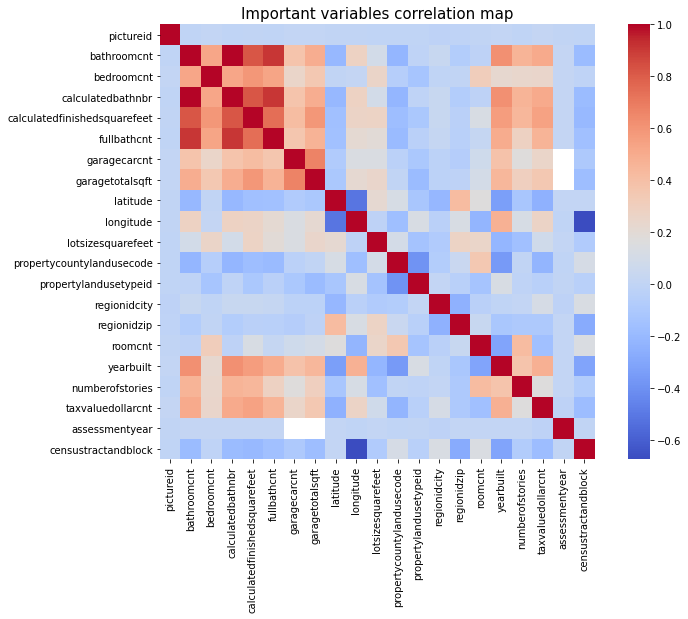

In [196]:
corrmat = train_df.corr(method='spearman')

f, ax = plt.subplots(figsize=(12, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True,  cmap='coolwarm')
plt.title("Important variables correlation map", fontsize=15)
plt.show()

Imputation for the missing values

In [197]:
unique_counts = pd.DataFrame(train_df.apply(lambda x: x.unique(), axis=0))

Handle missing values:
<br>
<br>
Apply 'mode' to the  columns:
`numberofstories`, `regionidcity`, `garagecarcnt`
<br>
Apply 'median'
`garagetotalsqft`, 

Apply `drop`
`regionidzip`,



In [205]:
train_df['garagetotalsqft'].fillna(train_df['garagetotalsqft'].median(), inplace=True)

train_df['numberofstories'].fillna(train_df['numberofstories'].mode()[0], inplace=True)
train_df['regionidcity'].fillna(train_df['regionidcity'].mode()[0], inplace=True)
train_df['garagecarcnt'].fillna(train_df['garagecarcnt'].mode()[0], inplace=True)

train_df = train_df.dropna(subset=['regionidzip']).reset_index(drop=True)

Categorical Imputations:

One-hot encode:
`propertycountylandusecode`, `propertylandusetypeid`, `rawcensustractandblock`, `regionidcity`, `regionidzip`, `censustractandblock`

In [206]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [207]:
need_encoded_columns = ['propertycountylandusecode',
                         'propertylandusetypeid', 
                         'regionidcity', 'regionidzip', 'censustractandblock']

In [208]:
encoder.fit(train_df[need_encoded_columns])

OneHotEncoder(handle_unknown='ignore')

In [209]:
column_name = encoder.get_feature_names(need_encoded_columns)


In [210]:
encoded_features = pd.DataFrame(encoder.transform(train_df[need_encoded_columns]).toarray(), columns = column_name)

In [211]:
import pickle
output = open('one-hot-encoder.pkl', 'wb')
pickle.dump(encoder, output)
output.close()


In [212]:
train_df.drop(columns = need_encoded_columns, inplace=True)

In [215]:
processed_df = pd.concat([train_df, encoded_features], axis = 1)

In [217]:
processed_df.describe()

,index,pictureid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fullbathcnt,garagecarcnt,garagetotalsqft,latitude,longitude,lotsizesquarefeet,roomcnt,yearbuilt,numberofstories,taxvaluedollarcnt,assessmentyear,propertycountylandusecode_1,propertycountylandusecode_34,propertycountylandusecode_38,propertycountylandusecode_96,propertycountylandusecode_122,propertycountylandusecode_135,propertylandusetypeid_246,propertylandusetypeid_247,propertylandusetypeid_248,propertylandusetypeid_261,propertylandusetypeid_266,regionidcity_5465.0,regionidcity_6285.0,regionidcity_8384.0,regionidcity_10608.0,regionidcity_12773.0,regionidcity_13693.0,regionidcity_15237.0,regionidcity_15554.0,regionidcity_16389.0,regionidcity_16764.0,regionidcity_17150.0,regionidcity_17597.0,regionidcity_17686.0,regionidcity_18874.0,regionidcity_21412.0,regionidcity_24812.0,regionidcity_24832.0,regionidcity_25218.0,regionidcity_25458.0,regionidcity_25459.0,regionidcity_26531.0,regionidcity_27491.0,regionidcity_32380.0,regionidcity_33252.0,regionidcity_33840.0,regionidcity_34780.0,regionidcity_37086.0,regionidcity_38032.0,regionidcity_40009.0,regionidcity_40081.0,regionidcity_42967.0,regionidcity_44833.0,regionidcity_46098.0,regionidcity_46314.0,regionidcity_47568.0,regionidcity_52650.0,regionidcity_52835.0,regionidcity_52842.0,regionidcity_53571.0,regionidcity_54352.0,regionidcity_54970.0,regionidzip_96180.0,regionidzip_96181.0,regionidzip_96183.0,regionidzip_96185.0,regionidzip_96186.0,regionidzip_96190.0,regionidzip_96203.0,regionidzip_96218.0,regionidzip_96225.0,regionidzip_96226.0,regionidzip_96939.0,regionidzip_96940.0,regionidzip_96941.0,regionidzip_96943.0,regionidzip_96946.0,regionidzip_96947.0,regionidzip_96948.0,regionidzip_96951.0,regionidzip_96952.0,regionidzip_96954.0,regionidzip_96956.0,regionidzip_96957.0,regionidzip_96958.0,regionidzip_96959.0,regionidzip_96961.0,regionidzip_96962.0,regionidzip_96963.0,regionidzip_96964.0,regionidzip_96965.0,regionidzip_96966.0,regionidzip_96967.0,regionidzip_96969.0,regionidzip_96971.0,regionidzip_96973.0,regionidzip_96974.0,regionidzip_96975.0,regionidzip_96978.0,regionidzip_96979.0,regionidzip_96980.0,regionidzip_96981.0,regionidzip_96982.0,regionidzip_96983.0,regionidzip_96985.0,regionidzip_96986.0,regionidzip_96987.0,regionidzip_96989.0,regionidzip_96990.0,regionidzip_96993.0,regionidzip_96995.0,regionidzip_96996.0,regionidzip_96998.0,regionidzip_97001.0,regionidzip_97003.0,regionidzip_97004.0,regionidzip_97005.0,regionidzip_97006.0,regionidzip_97007.0,regionidzip_97008.0,regionidzip_97016.0,regionidzip_97018.0,regionidzip_97020.0,regionidzip_97021.0,regionidzip_97023.0,regionidzip_97024.0,regionidzip_97025.0,regionidzip_97026.0,regionidzip_97027.0,regionidzip_97035.0,regionidzip_97037.0,regionidzip_97039.0,regionidzip_97040.0,regionidzip_97041.0,regionidzip_97043.0,regionidzip_97047.0,regionidzip_97048.0,regionidzip_97050.0,regionidzip_97051.0,regionidzip_97052.0,regionidzip_97059.0,regionidzip_97063.0,regionidzip_97064.0,regionidzip_97065.0,regionidzip_97066.0,regionidzip_97067.0,regionidzip_97068.0,regionidzip_97078.0,regionidzip_97079.0,censustractandblock_60375400000000,censustractandblock_60376200000000,censustractandblock_60590000000000,censustractandblock_60590100000000,censustractandblock_60590200000000,censustractandblock_60590300000000,censustractandblock_60590400000000,censustractandblock_60590500000000,censustractandblock_60590600000000,censustractandblock_60590700000000,censustractandblock_60590800000000,censustractandblock_60590900000000,censustractandblock_60591000000000,censustractandblock_60591100000000
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1.499900e+04,1.499900e+04,14999.000000,14999.000000,14999.000000,14999.000000,1.499900e+04,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999